In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [27]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [28]:
## Flattening
classifier.add(Flatten())

In [29]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [30]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [31]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [33]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
## Importing training data
train_set = train_datagen.flow_from_directory('helmet_detection\\training',
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [35]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [36]:
#which is with helmet which is without helmet?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [37]:
from PIL import Image

In [38]:
## Importng test data
test_set = test_datagen.flow_from_directory('helmet_detection\\testing',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [39]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=600,
        epochs=10,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/10
600/600 [==============================] - 63s 105ms/step - loss: 0.3062 - acc: 0.8693 - val_loss: 0.5506 - val_acc: 0.7453
Epoch 2/10
600/600 [==============================] - 65s 108ms/step - loss: 0.0932 - acc: 0.9653 - val_loss: 0.0856 - val_acc: 0.9714
Epoch 3/10
600/600 [==============================] - 64s 106ms/step - loss: 0.0395 - acc: 0.9860 - val_loss: 0.0655 - val_acc: 0.9856
Epoch 4/10
600/600 [==============================] - 59s 99ms/step - loss: 0.0317 - acc: 0.9889 - val_loss: 0.1384 - val_acc: 0.9520
Epoch 5/10
600/600 [==============================] - 60s 100ms/step - loss: 0.0254 - acc: 0.9910 - val_loss: 0.1475 - val_acc: 0.9521
Epoch 6/10
600/600 [==============================] - 68s 113ms/step - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0743 - val_acc: 0.9759
Epoch 7/10
600/600 [==============================] - 73s 121ms/step - loss: 0.0124 - acc: 0.9958 - val_loss: 0.0695 - val_acc: 0.9712
Epoch 8/10
600/600 [==============================] - 71

In [47]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('helmet_detection\\single_prediction\\abm.jpg'
                           ,target_size =(64,64))


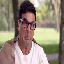

In [48]:
test_image

In [49]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [50]:
test_image=np.expand_dims(test_image,axis=0)

In [1]:
#For single prediction change the dimension using axis. To remove problem of batch
test_image=test_image.reshape(1,64,64,3)

NameError: name 'test_image' is not defined

In [51]:
result = classifier.predict(test_image)

In [52]:
## Class label of dog and cat

if result[0][0] == 1:
    prediction = 'with out helmet'
else:
    prediction = 'with  helmet'
    

In [53]:
prediction

'with out helmet'